## **Pre-processing and Feature Engineering**

In [83]:
import pandas as pd
import numpy as np

In [84]:
X = pd.read_csv("X_train.csv")
y = pd.read_csv("y_train.csv")
X_test_df = pd.read_csv("X_test.csv")

In [85]:
X.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0


In [86]:
y.head()

,Unique_ID,Dependent_Variable
0,Candidate_5926,1
1,Candidate_48134,0
2,Candidate_51717,1
3,Candidate_26401,0
4,Candidate_34872,0


We can see there are a lot of missing values in our dataset, so we first determine the percentage of missing values per column in the dataset

In [87]:
X.isnull().sum()/len(X)*100

Unique_ID     0.000000
C1            0.000000
C2            0.000000
C3            0.000000
C4            0.000000
C5            0.000000
C6            0.000000
C7            0.000000
C8            0.000000
N1            0.000000
N2           13.954614
N3            1.104387
N4           13.936460
N5           13.936460
N6            1.104387
N7            1.291982
N8            0.000000
N9            0.000000
N10           1.291982
N10.1         1.291982
N11           2.166415
N12          13.960666
N14           1.839637
N15           1.291982
N16          13.936460
N17          13.936460
N18          13.936460
N19          13.830560
N20          13.830560
N21          13.830560
N22          13.830560
N23           7.521936
N24           0.000000
N25          81.025719
N26          81.025719
N27          81.025719
N28          81.025719
N29          81.025719
N30          81.025719
N31          81.025719
N32          81.180030
N33           0.000000
N34           0.000000
N35        

As there are more than 80% missing values in rows N25 - N32, it is safe to assume that these columns would not be of much help in training the model. So, we remove these columns from our dataset.

In [88]:
X.drop(X.iloc[:,-11:-3], axis=1, inplace=True)
X.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,...,NaN,NaN,NaN,NaN,NaN,27.816,1750.000000,58.0,113.39,12.0
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,...,0.06,25856.0,17.0,0.88,1.0,40.000,10833.333330,160.0,262.10,17.0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,...,NaN,NaN,NaN,NaN,NaN,20.000,6250.000000,24.0,50.29,18.0
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,...,0.89,1006.0,6.0,1.00,0.0,26.000,2413.666667,70.0,126.52,27.0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,...,0.97,3398.0,31.0,0.96,0.0,44.000,7666.666667,100.0,205.47,21.0


Now, we determine the percentage of 0 values per columns in the dataset. The reason why we're doing this is if the percentage of 0s is high in any of the columns with missing values, then we can replace the missing values simply with 0, rather than computing them.

In [89]:
X[X == 0].count(axis=0)/len(X.index)*100

Unique_ID     0.000000
C1            0.000000
C2           30.841150
C3            9.957640
C4           11.824508
C5           13.930408
C6           53.204236
C7           14.196672
C8            7.667171
N1            0.006051
N2            1.055976
N3            0.245083
N4            0.586989
N5            0.832073
N6            0.000000
N7            0.000000
N8            5.872920
N9            8.614221
N10          72.741301
N10.1        34.541604
N11           5.748865
N12          69.627837
N14          63.152799
N15          75.128593
N16          84.302572
N17           5.688351
N18           8.801815
N19           6.535552
N20           0.006051
N21           0.075643
N22          41.900151
N23           0.036309
N24           1.894100
N33           0.000000
N34           1.676248
N35           0.000000
dtype: float64

As you can see above, there are certain numerical data columns that have a relatively high percentage of zeros. So, we replace the missing values in these columns with 0s

In [90]:
X[["N10","N10.1","N12","N14","N15","N16","N22"]] = X[["N10","N10.1","N12","N14","N15","N16","N22"]].fillna(0)
X.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,...,NaN,NaN,NaN,NaN,0.0,27.816,1750.000000,58.0,113.39,12.0
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,...,0.06,25856.0,17.0,0.88,1.0,40.000,10833.333330,160.0,262.10,17.0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,...,NaN,NaN,NaN,NaN,0.0,20.000,6250.000000,24.0,50.29,18.0
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,...,0.89,1006.0,6.0,1.00,0.0,26.000,2413.666667,70.0,126.52,27.0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,...,0.97,3398.0,31.0,0.96,0.0,44.000,7666.666667,100.0,205.47,21.0


We carry out the above pre-processing functions on the X_test dataset as well

In [91]:
X_test_df.drop(X_test_df.iloc[:,-11:-3], axis=1, inplace=True)
X_test_df[["N10","N10.1","N12","N14","N15","N16","N22"]] = X_test_df[["N10","N10.1","N12","N14","N15","N16","N22"]].fillna(0)

Now, we are left with the numerical data columns with missing values but no noticeable pattern in the data. And since we do not know the type of information they depict, it is very hard to make assumptions or replace missing values with 0 or mean, median, mode. Also, dropping these rows causes no increase in the performance of our models, rather a marginal decrease in the AUC scores. Hence, we use the MICE imputation method to calculate these values. MICE iteratively runs through the dataset to determine the missing values in a column as a function of all other column values in the dataset using regression.

In [92]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [93]:
imp = IterativeImputer(random_state = 0, max_iter = 10)
df_temp = X.iloc[:,1:]
imp.fit(df_temp)
df_imp = imp.transform(df_temp)
X[X.columns[1:]] = df_imp
X.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
0,Candidate_5926,1.0,0.0,11.0,31.0,0.0,0.0,0.0,1.0,23.75,...,0.795193,-14105.395467,6.047134,0.657868,0.0,27.816,1750.000000,58.0,113.39,12.0
1,Candidate_48134,1.0,4.0,2.0,66.0,2.0,0.0,1.0,1.0,11.05,...,0.060000,25856.000000,17.000000,0.880000,1.0,40.000,10833.333330,160.0,262.10,17.0
2,Candidate_51717,1.0,0.0,19.0,2.0,0.0,0.0,0.0,1.0,29.00,...,0.889708,-17935.293267,10.311402,0.473429,0.0,20.000,6250.000000,24.0,50.29,18.0
3,Candidate_26401,1.0,1.0,16.0,47.0,1.0,0.0,4.0,1.0,17.99,...,0.890000,1006.000000,6.000000,1.000000,0.0,26.000,2413.666667,70.0,126.52,27.0
4,Candidate_34872,1.0,1.0,13.0,1.0,1.0,1.0,6.0,1.0,27.50,...,0.970000,3398.000000,31.000000,0.960000,0.0,44.000,7666.666667,100.0,205.47,21.0


We carry out the same imputation technique with the X_test dataset

In [94]:
imp1 = IterativeImputer(random_state = 100, max_iter = 10)
df_temp1 = X_test_df.iloc[:,1:]
imp1.fit(df_temp1)
df_imp1 = imp1.transform(df_temp1)
X_test_df[X_test_df.columns[1:]] = df_imp1
X_test_df.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
0,Candidate_1602,1.0,0.0,0.0,23.0,0.0,1.0,0.0,1.0,18.00,...,0.6122,-773.162252,20.466551,0.672341,0.0,66.00000,3333.333333,50.0,90.38,23.0
1,Candidate_29650,1.0,0.0,2.0,4.0,2.0,1.0,2.0,1.0,16.75,...,0.8300,12165.000000,19.000000,0.940000,2.0,36.00000,5779.833333,300.0,532.93,16.0
2,Candidate_31061,1.0,2.0,3.0,38.0,1.0,0.0,4.0,1.0,29.99,...,0.7900,504.000000,34.000000,0.700000,2.0,48.00000,3083.333333,80.0,169.78,22.0
3,Candidate_5768,1.0,1.0,28.0,20.0,2.0,0.0,2.0,1.0,17.70,...,0.8400,1428.000000,9.000000,0.770000,0.0,36.00000,5117.083333,150.0,270.02,13.0
4,Candidate_27059,1.0,1.0,15.0,1.0,3.0,0.0,5.0,0.0,28.00,...,0.6400,6324.000000,25.000000,0.920000,2.0,1490.19881,0.000000,50.0,103.41,14.0


## **Model Evaluation and Selection**

Based on our dataset and objectives, we are going to test the performances of Logistic Regression, KNN, Random Forest and Naive Bayes classifiers to determine the ideal model.

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

Since we do not have a y_test dataset, it is impossible for us to evaluate our models only with the X_test dataset. Therefore, we split the X dataset (X_train.csv) into x_train and x_test and split the y dataset (y_train.csv) into y_train and y_test

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

We first carry out Logistic Regression and use the Newton-Cholesky solver here since we are dealing strictly with binary classification and the number of entries >> number of features. This solver also gives us better performance than 'lbfgs' (default) and and 'libsolver'. We then calculate its predicted probabilities

In [97]:
logReg = LogisticRegression(solver='newton-cholesky',max_iter=1000)
logReg.fit(x_train.iloc[:,1:], y_train.iloc[:,1])
logReg_predProb = logReg.predict_proba(x_test.iloc[:,1:])

Here, we try to determine the best value for k in order to train the best knn classifier for our dataset

In [98]:
vals = []
scale = StandardScaler()
X_knn = scale.fit_transform(x_train.iloc[:,1:])

for i in range(1,21):
    test = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(test, X_knn, y_train.iloc[:,1], cv=5)
    vals.append(np.mean(score))

k_best = np.argmax(vals)
k_best

19

Here, we train the KNN classifier with the best possible k-value and calculate its predicted probabilties

In [99]:
knn = KNeighborsClassifier(n_neighbors = k_best)
knn.fit(x_train.iloc[:,1:], y_train.iloc[:,1])
knn_predProb = knn.predict_proba(x_test.iloc[:,1:])

Here, we train the Random Forest Classifier and calculate its predicted probabilities

In [100]:
rfc = RandomForestClassifier()
rfc.fit(x_train.iloc[:,1:], y_train.iloc[:,1])
rfc_predProb = rfc.predict_proba(x_test.iloc[:,1:])

Here, we train the Naive Bayes Clssifier using Gaussian Naive Bayes and calculate its predicted probabilities

In [101]:
nb = GaussianNB()
nb.fit(x_train.iloc[:,1:], y_train.iloc[:,1])
nb_predProb = nb.predict_proba(x_test.iloc[:,1:])

In [102]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Now, we determine the false positive rate, true positive rate and threshold values for each of our classifiers using the roc_curve function and the predicted probabilities for each of the classifiers. We set pos_label = 1 as we are only interested in determining the probabilty of predicting class 1

In [103]:
fpr_logReg, tpr_logReg, thresh_logReg = roc_curve(y_test.iloc[:,1], logReg_predProb[:,1], pos_label=1)

In [104]:
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test.iloc[:,1], knn_predProb[:,1], pos_label=1)

In [105]:
fpr_rfc, tpr_rfc, thresh_rfc = roc_curve(y_test.iloc[:,1], rfc_predProb[:,1], pos_label=1)

In [106]:
fpr_nb, tpr_nb, thresh_nb = roc_curve(y_test.iloc[:,1], nb_predProb[:,1], pos_label=1)

We create a hypothetical case here with 0.5 AUC score in order to represent the performance of our models better while visulaizing them later on

In [107]:
probs = [0 for i in range(len(y_test))]
fpr, tpr, thresholds = roc_curve(y_test.iloc[:,1], probs, pos_label=1)

Now, we calculate the AUC score for each of our classifiers

In [108]:
auc_score_logReg = roc_auc_score(y_test.iloc[:,1], logReg_predProb[:,1])
auc_score_logReg

0.7435275176722618

In [109]:
auc_score_knn = roc_auc_score(y_test.iloc[:,1], knn_predProb[:,1])
auc_score_knn

0.6171212811051984

In [110]:
auc_score_rfc = roc_auc_score(y_test.iloc[:,1], rfc_predProb[:,1])
auc_score_rfc

0.7630493577630749

In [111]:
auc_score_nb = roc_auc_score(y_test.iloc[:,1], nb_predProb[:,1])
auc_score_nb

0.7016556286307308

Now, we represent the performance of our models on a graph to better understand how they compare to each other

In [112]:
import matplotlib.pyplot as plt

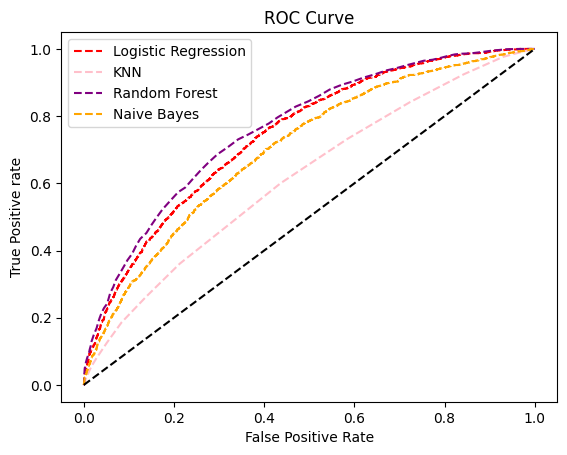

In [113]:
plt.plot(fpr_logReg, tpr_logReg, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr_knn, tpr_knn, linestyle='--',color='pink', label='KNN')
plt.plot(fpr_rfc, tpr_rfc, linestyle='--',color='purple', label='Random Forest')
plt.plot(fpr_nb, tpr_nb, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(fpr, tpr, linestyle='--', color='black')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.show()

As we observed before, and can see in the graph as well, the Random Forest classifier outperforms the other classifiers when it comes to the AUC score and hence, is the more ideal method for our binary classification purpose

## **Computing Results**

Now, we are going to use the Random Forest classifier model, which we trained earlier, on the X_test dataset that has been provided to us (X_test.csv) in order to get the predicted probabilties for each entry in the dataset

In [114]:
rfc_predProb_res = rfc.predict_proba(X_test_df.iloc[:,1:])
rfc_predProb_res

array([[0.67, 0.33],
       [0.8 , 0.2 ],
       [0.78, 0.22],
       ...,
       [0.58, 0.42],
       [0.76, 0.24],
       [0.8 , 0.2 ]])

We create a dataset to store each of the unique IDs in the X_test dataset and the probability of predicting class 1 for each of them

In [115]:
result_df = pd.DataFrame()
result_df['Unique_ID'] = X_test_df['Unique_ID']
result_df['Class_1_Probability'] = rfc_predProb_res[:,1]
result_df

,Unique_ID,Class_1_Probability
0,Candidate_1602,0.33
1,Candidate_29650,0.20
2,Candidate_31061,0.22
3,Candidate_5768,0.18
4,Candidate_27059,0.45
...,...,...
11012,Candidate_7453,0.56
11013,Candidate_38211,0.30
11014,Candidate_25020,0.42
11015,Candidate_44501,0.24


Finally, we store this dataset as final_predictions.csv

In [117]:
result_df.to_csv('final_predictions.csv',index=False)